### The most basic factors that make up house prices are economic, political and demographic factors. In order to better understand the impact of these factors on price in this notebook, I gathered this data from various sources and investigated the impact on price. I also selected some of them to be able to use them later in the machine learning model.

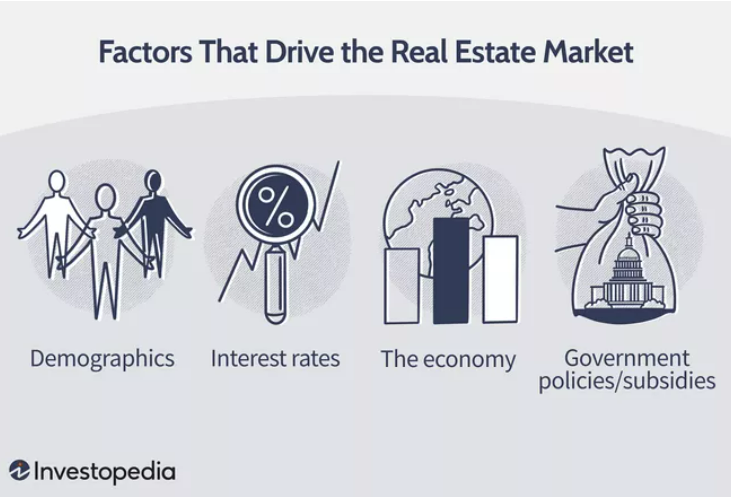

# Importing Libraries

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# 1.1 - The Consumer Price Index (CPI) 
CPI is a measure of the average change overtime in the prices paid by urban consumers for a market basket of consumer goods and services.

# 1.2 - Inflation
Inflation impacts real estate in several ways. For example, building a home increases significantly because of rising wages and more expensive supplies and materials. Investors have had a hard time finding reasonably priced rental homes and expanding rental businesses.

# Data Source https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-

In [118]:
cpi = pd.read_excel("ConsumerPriceIndex1913_2022.xlsx")

In [119]:
cpi.head()

,Year,Annual Average CPI(-U),Annual Percent Change \n (rate of inflation)
0,Year,Annual Average CPI(-U),Annual Percent Change_x000D_\n\n (r...
1,1913,9.9,NaN
2,1914,10.0,1.3%
3,1915,10.1,0.9%
4,1916,10.9,7.7%


# Select years after 1985

In [120]:
cpiandinflation = cpi.tail(38)

In [121]:
cpiandinflation.head()

,Year,Annual Average CPI(-U),Annual Percent Change \n (rate of inflation)
73,1985,107.6,3.5%
74,1986,109.6,1.9%
75,1987,113.6,3.7%
76,1988,118.3,4.1%
77,1989,124.0,4.8%


# 1.3 - The US Dollar Index (DXY, DX, USDX)
### Measures the value of the United States dollar relative to a basket of other currencies, including the currencies of some of the US's major trading partners.

# Data Source: https://finance.yahoo.com/quote/DX-Y.NYB/history/

In [122]:
dxy = pd.read_csv("DX-Y.NYB.csv")

In [123]:
dxy

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,152.229996,153.889999,151.800003,152.720001,152.720001,0
1,1985-02-01,153.470001,164.720001,153.470001,160.410004,160.410004,0
2,1985-03-01,161.039993,163.830002,149.179993,149.179993,149.179993,0
3,1985-04-01,150.649994,153.160004,144.830002,149.699997,149.699997,0
4,1985-05-01,151.570007,154.520004,147.059998,147.860001,147.860001,0
...,...,...,...,...,...,...,...
448,2022-05-01,103.209999,105.010002,101.300003,101.750000,101.750000,0
449,2022-06-01,101.760002,105.790001,101.639999,104.690002,104.690002,0
450,2022-07-01,104.779999,109.290001,104.739998,105.900002,105.900002,0
451,2022-08-01,105.830002,109.480003,104.639999,108.699997,108.699997,0


# Convert Date Column to datetime for selecting over dates

In [124]:
dxy.index= (pd.to_datetime(dxy['Date']))
dxy.drop(['Date'],axis=1,inplace=True)

# Took every years between 1985 - 2022 last Close value 

In [125]:
dxydf = pd.DataFrame()
for i in range(1985,2023):
    add = dxy[dxy.index.year == i].tail(1)
    dxydf = pd.concat([dxydf,add],axis=0)  
 

In [126]:
dxydf = dxydf[['Close']] 

In [127]:
dxydf.head()

,Close
Date,
1985-12-01,123.459999
1986-12-01,103.580002
1987-12-01,85.419998
1988-12-01,92.500000
1989-12-01,93.209999


# 1.4 - M1 Money Supply 

M1 is the money supply that is composed of currency, demand deposits, other liquid deposits—which includes savings deposits. M1 includes the most liquid portions of the money supply because it contains currency and assets that either are or can be quickly converted to cash.

 There is a direct relationship between the amount of money supply that is available in the system and the amount of money that finds its way into the real estate market. This is because real estate is one of the most preferred investment classes in the world. It is considered to be a safe haven and one of the safest hedges against inflation.

# Data Source: https://fred.stlouisfed.org/series/M1SL

Source: Board of Governors of the Federal Reserve System (US)  Release: H.6 Money Stock Measures  

Units:  Billions of Dollars, Seasonally Adjusted

Frequency:  Monthly

# Convert the column containing the date to the pandas datetimeindex datatype and assign it to the index of the data.

In [128]:
moneysupply = pd.read_csv("M1SL.csv")
moneysupply.index = pd.to_datetime(moneysupply['DATE'])

# Filtered 2012-2022 data and save it for to be using in the model

In [129]:
moneysupply.iloc[636:752].to_csv("m1moneysupplymonthly.csv")

# Filter last value for every year between 1985- 2022 for comparison

In [130]:
moneysupplydf = pd.DataFrame()
for i in range(1985,2023):
    add = moneysupply[moneysupply.index.year == i].tail(1)
    moneysupplydf = pd.concat([moneysupplydf,add],axis=0)

In [131]:
moneysupplydf.head()   

,DATE,M1SL
DATE,,
1985-12-01,1985-12-01,619.8
1986-12-01,1986-12-01,724.7
1987-12-01,1987-12-01,750.2
1988-12-01,1988-12-01,786.7
1989-12-01,1989-12-01,792.9


# 1.5 -  Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity
The 10-year Treasury yield is the yield that the government pays investors that purchase the specific security.

Low interest rates tend to increase demand for property, driving up prices, while high interest rates generally do the opposite.

There are many different ways to value real estate. Examples include replacement cost, income model, and comparable sales. I assume you're talking about the comparable sale method of valuing real estate.

In the simplest terms, interest rates affect the prices of real estate by affecting its affordability. Rising interest-rate's tend to have a chilling effect on real estate prices because, as interest rates rise, it costs more to borrow the money it takes to purchase the real estate.

Inversely, as interest rates drop capital becomes more affordable and borrowing becomes cheaper making it possible to purchase more real estate. So as it becomes more feasible to purchase real estate more people purchase real estate, and prices tend to increas

# https://fred.stlouisfed.org/series/DGS10

# Read and convert index to datetimeindex

In [132]:
interest_10years = pd.read_csv("DGS10.csv")
interest_10years.index= (pd.to_datetime(interest_10years['DATE']))
interest_10years.drop(['DATE'],axis=1,inplace=True)

# Select and save monthly data between 2012-  2022 for using it in Machine Learning

In [133]:
interest_10years.iloc[13060:].asfreq('M',method='ffill').to_csv("interestmonthly.csv")

#  Filter last value for every year between 1985- 2022 for comparison

In [134]:
#For understanding how loop works
interest_10years[interest_10years.index.year == 1985].tail(1) #Took last value for desired year

,DGS10
DATE,
1985-12-31,9.00


# Filter last value for every year between 1985- 2022 for comparison

In [135]:
interest_10yearsdf = pd.DataFrame()
for i in range(1985,2023):
    add = interest_10years[interest_10years.index.year == i].tail(1)
    interest_10yearsdf = pd.concat([interest_10yearsdf,add],axis=0)

In [136]:
interest_10yearsdf.tail()

,DGS10
DATE,
2018-12-31,2.69
2019-12-31,1.92
2020-12-31,0.93
2021-12-31,1.52
2022-09-20,3.57


# 1.6 - Velocity of M2 Money Stock

The velocity of money is an indicator of people’s willingness to buy things.

The velocity of money is the frequency at which one unit of currency is used to purchase domestically- produced goods and services within a given time period. In other words, it is the number of times one dollar is spent to buy goods and services per unit of time. If the velocity of money is increasing, then more transactions are occurring between individuals in an economy.

The real estate market is closely tied to how well the economy performs. When house prices go up, homeowners feel more confident, so they tend to buy new furniture, renovate their homes, and increase their discretionary spending.

There is a whole industry that benefits every time someone buys a home. From the real estate agent, mortgage brokers, furniture stores, painters, renovation contractors, and local shops, many related businesses benefit whenever homebuyers purchase a property.

Speed matters too, particularly if you’re buying a home as an investment; the faster money turns over, the quicker it will get back to you, with profits.  


# https://fred.stlouisfed.org/series/M2V#:~:text=The%20velocity%20of%20money%20is,services%20per%20unit%20of%20time.


Units:  Ratio, Seasonally Adjusted

Frequency:  Quarterly

In [137]:
velocityofmoney = pd.read_csv("M2V.csv") #ratio

In [138]:
velocityofmoney.head()

,DATE,M2V
0,1959-01-01,1.773
1,1959-04-01,1.789
2,1959-07-01,1.773
3,1959-10-01,1.779
4,1960-01-01,1.817


# Convert index to datetime index 

In [139]:
velocityofmoney.index= (pd.to_datetime(velocityofmoney['DATE']))
velocityofmoney.drop(['DATE'],axis=1,inplace=True)

# Then we select and save the monthly data between 2012 and 2022 in order to use it in machine learning.

In [140]:
velocityofmoney.M2V.iloc[211:,].asfreq('M',method="ffill").to_csv("velocityofmoney.csv")

# For each year between 1985 and 2022, it takes the last data of that year and assigns it to a column.

In [141]:
velocityofmoneydf = pd.DataFrame()
for i in range(1985,2023):
    add = velocityofmoney[velocityofmoney.index.year == i].tail(1)
    velocityofmoneydf = pd.concat([velocityofmoneydf,add],axis=0)

In [142]:
velocityofmoneydf.head()

,M2V
DATE,
1985-10-01,1.792
1986-10-01,1.721
1987-10-01,1.776
1988-10-01,1.813
1989-10-01,1.834


# 2 - Demographic factors


# 2-1 Migration

In-migration has a major impact on real estate as demand for both residential and commercial space increases. If supply is unable to match the demand, this often results in pressure on prices.

# https://gis.dola.colorado.gov/population/data/regional-data-lookup/

In [143]:
migration = pd.read_csv("region_profile.csv")

In [144]:
migration.tail()

,Region Number,Year,Region,Total Population,Unnamed: 4,Unnamed: 5,Net Migration,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
31,NaN,2016,Colorado,5.529.629,NaN,NaN,53.295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,2017,Colorado,5.599.589,NaN,NaN,42.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,2018,Colorado,5.676.913,NaN,NaN,51.761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,2019,Colorado,5.734.913,NaN,NaN,34.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,2020,Colorado,5.782.914,NaN,NaN,27.341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Select Net Migration from Raw Data

In [145]:
migration = migration[['Net Migration']]

In [146]:
migration.head()

,Net Migration
0,5.172
1,-5.019
2,-13.166
3,-23.942
4,-18.552


# Converting it to integer format

In [147]:
migration['Net Migration'] = migration['Net Migration']*1000

In [148]:
migration['Net Migration'] = migration['Net Migration'].astype('int')

# We have data until 2020 but better if we have it until 2022

# Data for 2021 https://kdvr.com/news/data/is-colorado-losing-its-shine-census-data-shows-slowing-population-growth/?ipid=promo-link-block1
# Used same value for 2022 as an assumption

In [149]:
arrformigration = migration['Net Migration'].values

In [150]:
arrformigration = np.append(arrformigration, values=[14700,14700]) 

In [151]:
# Contains 1985 - 2022 migration data 
arrformigration

array([  5172,  -5019, -13166, -23942, -18552, -12472,  45473,  76760,
        84281,  77059,  69844,  61473,  63044,  75124,  79306,  85875,
        67121,  21251,  10313,  14300,  13779,  42896,  35000,  40469,
        36267,  37569,  39312,  39143,  45109,  45062,  68844,  53295,
        42395,  51761,  34162,  27341,  14700,  14700])

# 2-2 Colorado Annually Total Population

Population change leads to a changing demand for housing.
Population growth, and particularly the growth in the number of households,
leads to a growth in housing demand. Population decline might, in the long run, lead to a decrease in housing demand.


The real estate market is closely tied to how well the economy performs. When house prices go up, homeowners feel more confident, so they tend to buy new furniture, renovate their homes, and increase their discretionary spending.

There is a whole industry that benefits every time someone buys a home. From the real estate agent, mortgage brokers, furniture stores, painters, renovation contractors, and local shops, many related businesses benefit whenever homebuyers purchase a property.

Speed matters too, particularly if you’re buying a home as an investment; the faster money turns over, the quicker it will get back to you, with profits.  

Units:  Thousands of Persons, Not Seasonally Adjusted

Frequency:  Annual


# Data Source: https://fred.stlouisfed.org/series/COPOP


In [280]:
population = pd.read_csv("COPOP.csv")

In [281]:
population.head()

,DATE,COPOP
0,1900-01-01,543.0
1,1901-01-01,581.0
2,1902-01-01,621.0
3,1903-01-01,652.0
4,1904-01-01,659.0


In [282]:
population['COPOP'] = population['COPOP']*1000
population['COPOP'] = population['COPOP'].astype('int')

In [283]:
population = population.iloc[85:]

In [284]:
population.head()

,DATE,COPOP
85,1985-01-01,3208723
86,1986-01-01,3237450
87,1987-01-01,3260480
88,1988-01-01,3262281
89,1989-01-01,3275818


In [285]:
arrforpop = population.COPOP.values

# Data Source for 2022: https://worldpopulationreview.com/states/colorado-population 

In [286]:
arrforpop = np.append(arrforpop, 5922618 ) 

In [287]:
# Contains 1985 - 2022 population data 
arrforpop

array([3208723, 3237450, 3260480, 3262281, 3275818, 3303862, 3367567,
       3459995, 3560884, 3653910, 3738061, 3812716, 3891293, 3968967,
       4056133, 4326921, 4425687, 4490406, 4528732, 4575013, 4631888,
       4720423, 4803868, 4889730, 4972195, 5047539, 5121900, 5193660,
       5270774, 5352637, 5454328, 5543844, 5617421, 5697155, 5758486,
       5784308, 5812069, 5922618])

# 3 - Dependent Variable Colorado House Prices 

# All-Transactions House Price Index for Colorado Thousand Dollars
# 1945-2022 Quarterly
# https://fred.stlouisfed.org/series/COSTHPI


In [288]:
coloradopricecindex = pd.read_csv("COSTHPI.csv")
coloradopricecindex.index= (pd.to_datetime(coloradopricecindex['DATE']))
coloradopricecindex.drop(['DATE'],axis=1,inplace=True)

In [289]:
coloradopricecindex.head()

,COSTHPI
DATE,
1975-01-01,54.19
1975-04-01,54.84
1975-07-01,54.75
1975-10-01,55.01
1976-01-01,55.04


In [290]:
coloradopricecindexdf = pd.DataFrame()
for i in range(1985,2023):
    add = coloradopricecindex[coloradopricecindex.index.year == i].tail(1)
    coloradopricecindexdf = pd.concat([coloradopricecindexdf,add],axis=0)

In [291]:
coloradopricecindexdf.tail()

,COSTHPI
DATE,
2018-10-01,558.99
2019-10-01,585.71
2020-10-01,620.91
2021-10-01,744.45
2022-04-01,837.46


# Converted Data to Integer Type

In [292]:
coloradopricecindexdf['COSTHPI'] = coloradopricecindexdf['COSTHPI']*1000

In [293]:
coloradopricecindexdf['COSTHPI'] = coloradopricecindexdf['COSTHPI'].astype('int')

In [294]:
coloradopricecindexdf.tail()

,COSTHPI
DATE,
2018-10-01,558990
2019-10-01,585710
2020-10-01,620910
2021-10-01,744450
2022-04-01,837460


# The economic and demographic data collected from different sources are organized in a common dataframe to observe the effect on the price data.


# Creating Data with DXY Data and its index

In [295]:
econ = pd.DataFrame(data =dxydf.Close.values,  index  = [dxydf.index.year] ) 

In [296]:
econ.columns=['DXY']

# Created DataFrame

In [297]:
econ.head()

,DXY
Date,
1985,123.459999
1986,103.580002
1987,85.419998
1988,92.500000
1989,93.209999


# Adding CPI and Inflation to our DataFrame

In [298]:
econ['Annual Average CPI'] =  cpiandinflation['Annual Average CPI(-U)'].values

In [299]:
econ['Inflation Rate (%)'] =  cpiandinflation['Annual Percent Change \n            (rate of inflation)'].values

# Cleaning them and convert to float

In [300]:
econ = econ.replace({'%': ''}, regex=True)

In [301]:
econ['Annual Average CPI'] = econ['Annual Average CPI'].astype('float')

In [302]:
econ['Inflation Rate (%)'] = econ['Inflation Rate (%)'].astype('float')

In [303]:
econ.head()

,DXY,Annual Average CPI,Inflation Rate (%)
Date,,,
1985,123.459999,107.6,3.5
1986,103.580002,109.6,1.9
1987,85.419998,113.6,3.7
1988,92.500000,118.3,4.1
1989,93.209999,124.0,4.8


# Adding Money Supply 

In [304]:
econ['M1 Money Supply'] = moneysupplydf['M1SL'].values

In [305]:
econ.head()

,DXY,Annual Average CPI,Inflation Rate (%),M1 Money Supply
Date,,,,
1985,123.459999,107.6,3.5,619.8
1986,103.580002,109.6,1.9,724.7
1987,85.419998,113.6,3.7,750.2
1988,92.500000,118.3,4.1,786.7
1989,93.209999,124.0,4.8,792.9


# Adding Interest Rates and converting to float

In [306]:
econ['10 Year Treasury Rate'] = interest_10yearsdf['DGS10'].values

In [307]:
econ['10 Year Treasury Rate'] = econ['10 Year Treasury Rate'].astype('float')

In [308]:
econ.head()

,DXY,Annual Average CPI,Inflation Rate (%),M1 Money Supply,10 Year Treasury Rate
Date,,,,,
1985,123.459999,107.6,3.5,619.8,9.00
1986,103.580002,109.6,1.9,724.7,7.23
1987,85.419998,113.6,3.7,750.2,8.83
1988,92.500000,118.3,4.1,786.7,9.14
1989,93.209999,124.0,4.8,792.9,7.93


# Adding Migration Data

In [309]:
econ['Net Migration'] = arrformigration

In [310]:
econ.head()

,DXY,Annual Average CPI,Inflation Rate (%),M1 Money Supply,10 Year Treasury Rate,Net Migration
Date,,,,,,
1985,123.459999,107.6,3.5,619.8,9.00,5172
1986,103.580002,109.6,1.9,724.7,7.23,-5019
1987,85.419998,113.6,3.7,750.2,8.83,-13166
1988,92.500000,118.3,4.1,786.7,9.14,-23942
1989,93.209999,124.0,4.8,792.9,7.93,-18552


# Adding Total Population Data

In [311]:
econ['Colorado Total Population'] = arrforpop

In [312]:
econ.head()

,DXY,Annual Average CPI,Inflation Rate (%),M1 Money Supply,10 Year Treasury Rate,Net Migration,Colorado Total Population
Date,,,,,,,
1985,123.459999,107.6,3.5,619.8,9.00,5172,3208723
1986,103.580002,109.6,1.9,724.7,7.23,-5019,3237450
1987,85.419998,113.6,3.7,750.2,8.83,-13166,3260480
1988,92.500000,118.3,4.1,786.7,9.14,-23942,3262281
1989,93.209999,124.0,4.8,792.9,7.93,-18552,3275818


# Setting a proper Index

In [313]:
forindex = pd.date_range(start='1/1/1985', end='1/1/2023' , freq='A')

In [314]:
econ.index = forindex

# Adding Velocity of Money Data

In [315]:
econ['Velocity of M2 Money Stock (%)'] = velocityofmoneydf['M2V'].values

In [316]:
econ.head()

,DXY,Annual Average CPI,Inflation Rate (%),M1 Money Supply,10 Year Treasury Rate,Net Migration,Colorado Total Population,Velocity of M2 Money Stock (%)
1985-12-31,123.459999,107.6,3.5,619.8,9.00,5172,3208723,1.792
1986-12-31,103.580002,109.6,1.9,724.7,7.23,-5019,3237450,1.721
1987-12-31,85.419998,113.6,3.7,750.2,8.83,-13166,3260480,1.776
1988-12-31,92.500000,118.3,4.1,786.7,9.14,-23942,3262281,1.813
1989-12-31,93.209999,124.0,4.8,792.9,7.93,-18552,3275818,1.834


In [317]:
econ = econ.reset_index()

In [318]:
econ.rename(columns = {'index':'Date'}, inplace = True)

In [319]:
econ.head()

,Date,DXY,Annual Average CPI,Inflation Rate (%),M1 Money Supply,10 Year Treasury Rate,Net Migration,Colorado Total Population,Velocity of M2 Money Stock (%)
0,1985-12-31,123.459999,107.6,3.5,619.8,9.00,5172,3208723,1.792
1,1986-12-31,103.580002,109.6,1.9,724.7,7.23,-5019,3237450,1.721
2,1987-12-31,85.419998,113.6,3.7,750.2,8.83,-13166,3260480,1.776
3,1988-12-31,92.500000,118.3,4.1,786.7,9.14,-23942,3262281,1.813
4,1989-12-31,93.209999,124.0,4.8,792.9,7.93,-18552,3275818,1.834


# Adding Colorado House Price Index Data 

In [320]:
econ['Colorado House Price Index'] = coloradopricecindexdf['COSTHPI'].values

In [321]:
econ.head()

,Date,DXY,Annual Average CPI,Inflation Rate (%),M1 Money Supply,10 Year Treasury Rate,Net Migration,Colorado Total Population,Velocity of M2 Money Stock (%),Colorado House Price Index
0,1985-12-31,123.459999,107.6,3.5,619.8,9.00,5172,3208723,1.792,124230
1,1986-12-31,103.580002,109.6,1.9,724.7,7.23,-5019,3237450,1.721,127990
2,1987-12-31,85.419998,113.6,3.7,750.2,8.83,-13166,3260480,1.776,124430
3,1988-12-31,92.500000,118.3,4.1,786.7,9.14,-23942,3262281,1.813,123480
4,1989-12-31,93.209999,124.0,4.8,792.9,7.93,-18552,3275818,1.834,126440


# Calculating percentage change in price index data and adding it as a new column

In [322]:
econ['Price Change'] = econ['Colorado House Price Index'].pct_change()

In [323]:
econ.head()

,Date,DXY,Annual Average CPI,Inflation Rate (%),M1 Money Supply,10 Year Treasury Rate,Net Migration,Colorado Total Population,Velocity of M2 Money Stock (%),Colorado House Price Index,Price Change
0,1985-12-31,123.459999,107.6,3.5,619.8,9.00,5172,3208723,1.792,124230,NaN
1,1986-12-31,103.580002,109.6,1.9,724.7,7.23,-5019,3237450,1.721,127990,0.030266
2,1987-12-31,85.419998,113.6,3.7,750.2,8.83,-13166,3260480,1.776,124430,-0.027815
3,1988-12-31,92.500000,118.3,4.1,786.7,9.14,-23942,3262281,1.813,123480,-0.007635
4,1989-12-31,93.209999,124.0,4.8,792.9,7.93,-18552,3275818,1.834,126440,0.023971


# Filling nan value with first valid value

In [324]:
econ['Price Change'] = econ['Price Change'].fillna(0.030266)

# Replacing Price Change and House Price Index Columns

In [325]:
#define function to swap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
econ = swap_columns(econ, 'Colorado House Price Index', 'Price Change')


In [326]:
econ.head()

,Date,DXY,Annual Average CPI,Inflation Rate (%),M1 Money Supply,10 Year Treasury Rate,Net Migration,Colorado Total Population,Velocity of M2 Money Stock (%),Price Change,Colorado House Price Index
0,1985-12-31,123.459999,107.6,3.5,619.8,9.00,5172,3208723,1.792,0.030266,124230
1,1986-12-31,103.580002,109.6,1.9,724.7,7.23,-5019,3237450,1.721,0.030266,127990
2,1987-12-31,85.419998,113.6,3.7,750.2,8.83,-13166,3260480,1.776,-0.027815,124430
3,1988-12-31,92.500000,118.3,4.1,786.7,9.14,-23942,3262281,1.813,-0.007635,123480
4,1989-12-31,93.209999,124.0,4.8,792.9,7.93,-18552,3275818,1.834,0.023971,126440


# The necessary data has been brought into the appropriate format, cleaned and added as a column, after that we can look at the relations with the price.

# A few visualizations showing how this features relate to price

In [ ]:
import plotly.express as px
fig = px.scatter(x=econ['Colorado Total Population'] , y=econ['Colorado House Price Index'])

fig.update_layout(

    title={
        'text': " Population -  House Prices  ",
        'y':0.92,
        'x':0.49,
        'xanchor': 'center',
        'yanchor': 'top'},

    template="simple_white"
    
)

fig.update_xaxes(title_text="<b></b>Colorado Total Population")
fig.update_yaxes(title_text="<b></b>Colorado House Price Index ($)")

fig.show()

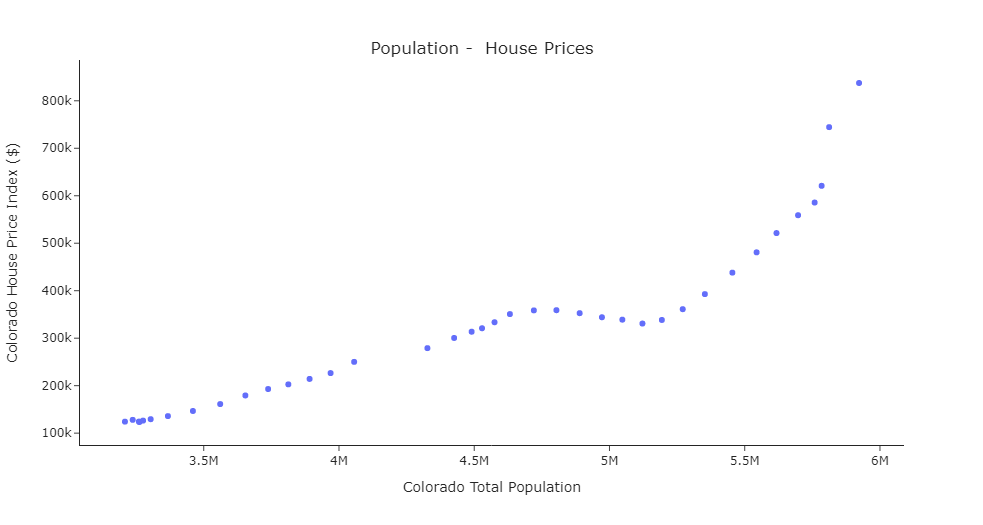

# Correlation between all data and price.

With correlation, we can get an idea about which columns affect the price and how much.

***However, we should be aware  that Correlation does not imply causation.***

In [ ]:
import seaborn as sns

df_corr = econ.corr()
import plotly.figure_factory as ff
x = list(df_corr.columns)
y = list(df_corr.index)
z = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )
fig.show()

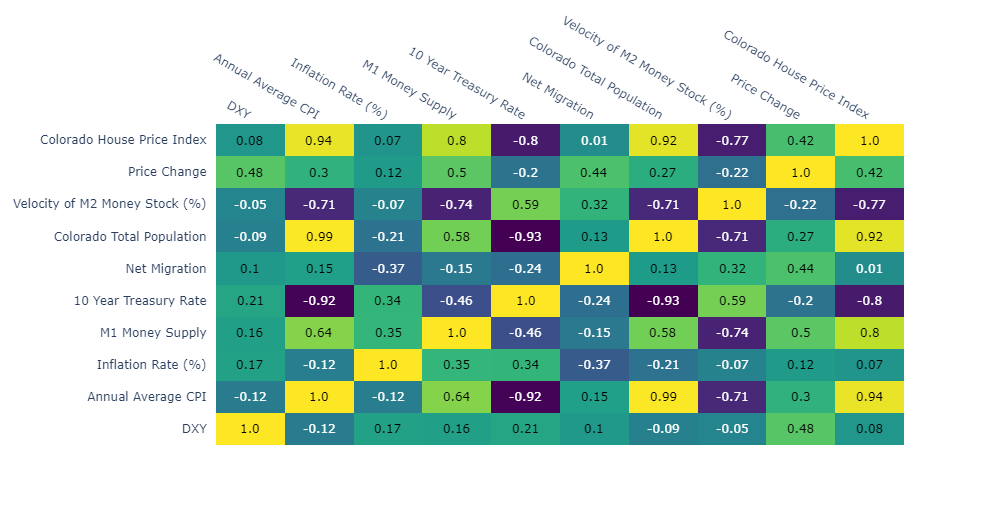

# A chart for observing the relationship between 10-year interest rates and home prices in Colorado.

In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x =  econ.Date,
    y= econ['Colorado House Price Index'],
    name='Price',    # this sets its legend entry
    line=dict(color='black', width=2)
),secondary_y=True)



fig.add_trace(go.Scatter(
    x =  econ.Date,
    y= econ['10 Year Treasury Rate'],
    name='Rate',
    line=dict(color='red', width=2)
), secondary_y=False)




fig.update_layout(
    
    xaxis_title="Date",    
    legend_title="Traces",
    
    font=dict(
        family="Droid Serif",
        size=15,
        color="RebeccaPurple",        
    )
)



fig.update_layout(

    title={
        'text': " Interest Rates  ",
        'y':0.92,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'},

    template="simple_white"
    
)


fig.update_yaxes(showline=True ,linecolor='red',linewidth=2.3, title_text="<b></b>Interest Rates (%)", secondary_y=False)
fig.update_yaxes(title_text="<b></b>Colorado House Price Index ($)", secondary_y=True)



fig.show() 

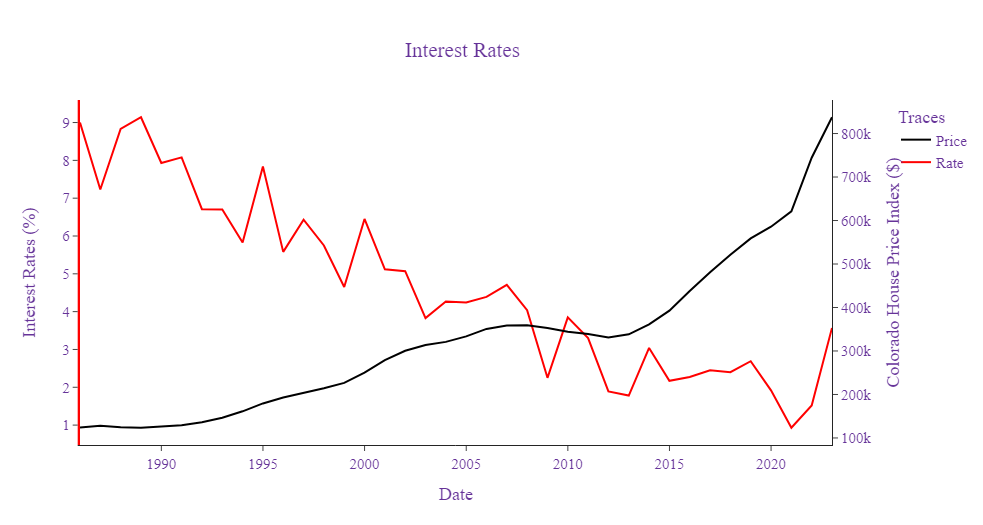

# For understanding how money supply and house prices affect each other.

In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x =  econ.Date,
    y= econ['Colorado House Price Index'],
    name='Price',    # this sets its legend entry
    line=dict(color='black', width=2)
),secondary_y=True)

fig.add_trace(go.Scatter(
    x =  econ.Date,
    y= econ['M1 Money Supply'],
    name='Money',
    line=dict(color='blue', width=2)
), secondary_y=False)


fig.update_layout(
    
    xaxis_title="Date",    
    
    legend_title="Traces",
    
    font=dict(
        family="Droid Serif",
        size=15,
        color="RebeccaPurple",        
    )
)

fig.update_layout(
     
    title={
        'text': " Price - Money Supply  ",
        'y':0.92,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'},

    template="simple_white"
    
)

fig.update_yaxes(showline=True ,linecolor='blue',linewidth=2.3, title_text="<b>Money (Billions $)</b>", secondary_y=False)
fig.update_yaxes(showline=True ,linecolor='black',linewidth=1.2, title_text="Cost<b> ($)</b>", secondary_y=True)

fig.show() 

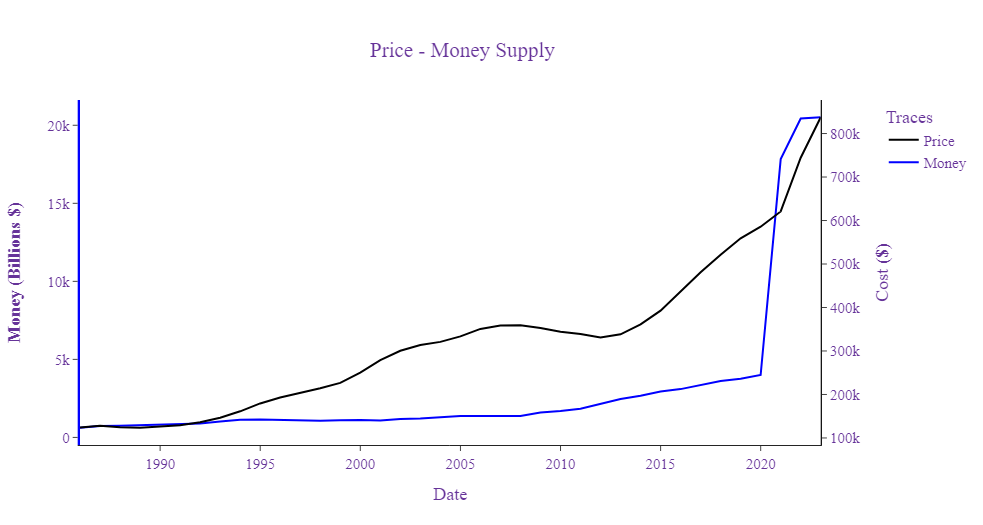

# CPI and Colorado House Prices

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]]) #FF5733 #43B02A
    
#with plotly.go, each trace needs to be added into the figure separately

fig.add_trace(go.Bar(x=econ.Date, y=econ['Annual Average CPI'], name='CPI' ,marker_color = '#35C36E',offsetgroup=1 ,), secondary_y=False)
    
fig.add_trace(go.Scatter(
    x =  econ.Date,
    y= econ['Colorado House Price Index'],
    name='Price',    # this sets its legend entry
    line=dict(color='black', width=2)
),secondary_y=True)

#change layout preferences
fig.update_layout(
barmode='group',
font_size = 14,
hovermode="x unified",
)

#set y-axes titles
fig.update_yaxes(title_text="Cost ($)<b></b> ", secondary_y=True)
fig.update_yaxes(title_text="CPI: <b>Consumer Price Index </b>", secondary_y=False)

fig.update_layout(
     
    title={
        'text': "CPI - Colorado House Prices",
        'y':0.92,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'},

    template="simple_white"  
)

fig.show()

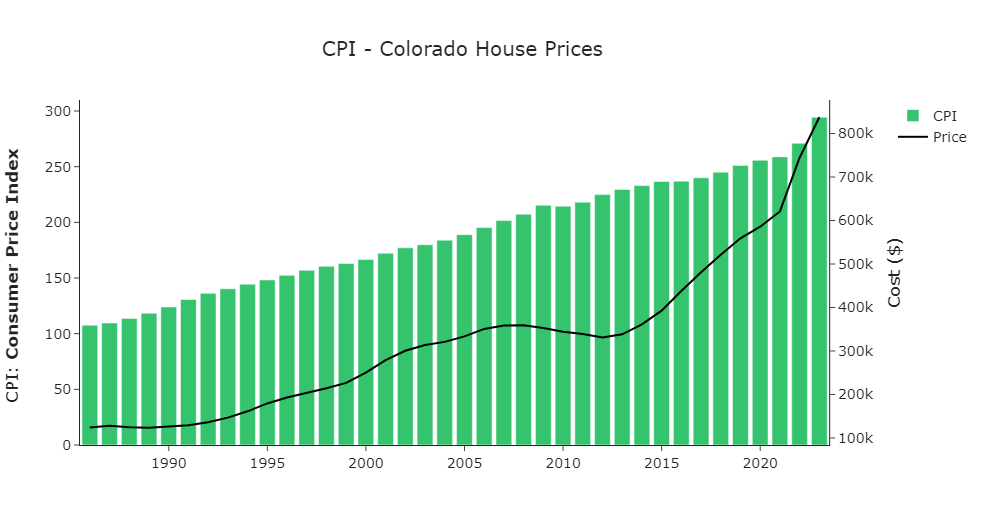

# How does population growth affect prices?

In [ ]:
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x =  econ.Date,
    y= econ['Colorado House Price Index'],
    name='Price',    # this sets its legend entry
    line=dict(color='black', width=2)
),secondary_y=True)

fig.add_trace(go.Scatter(
    x =  econ.Date,
    y= econ['Colorado Total Population'],
    name='Money',
    line=dict(color='blue', width=2)
), secondary_y=False)

fig.update_layout(
    
    xaxis_title="Date",    
    
    legend_title="Traces",
    
    font=dict(
        family="Droid Serif",
        size=15,
        color="RebeccaPurple",        
    )
)

fig.update_layout(
     
    title={
        'text': " Total Population - House Prices in Colorado  ",
        'y':0.92,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'},

    template="simple_white"
    
)


fig.update_yaxes(showline=True ,linecolor='blue',linewidth=2.3, title_text="<b>Total Population</b>", secondary_y=False)
fig.update_yaxes(showline=True ,linecolor='black',linewidth=1.2, title_text="<b>Colorado House Price Index ($)</b>", secondary_y=True)


fig.update_layout(height=600, width=1000)

fig.show() 

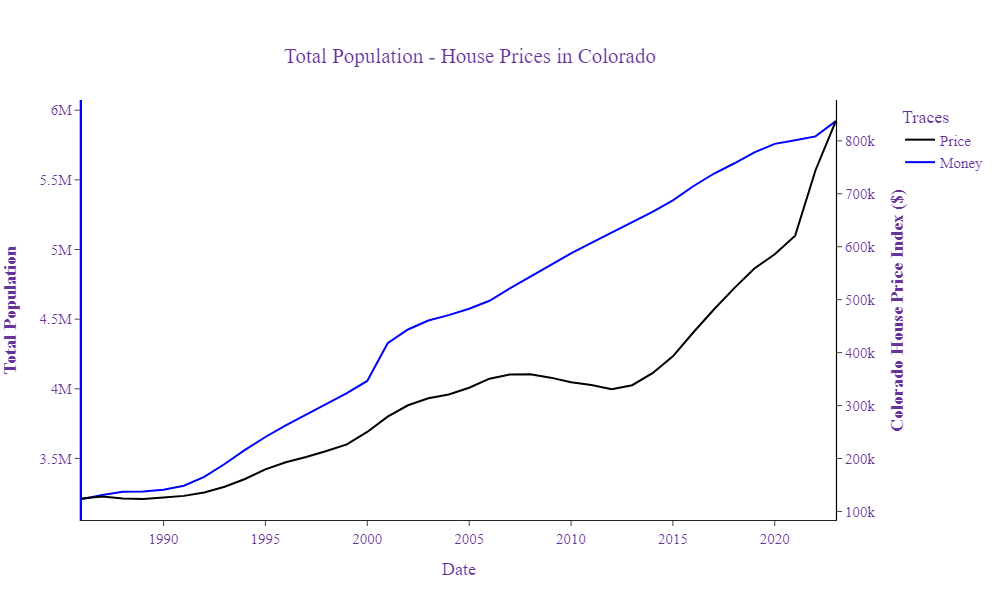

# We cannot use all of these features in machine learning. That's why we have to choose the most effective ones.

# Selecting Features with AutoFeat

In [396]:
from autofeat import AutoFeatRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [397]:
y = econ['Colorado House Price Index'].values

In [398]:
y=y.flatten()

In [399]:
y

array([124230, 127990, 124430, 123480, 126440, 129380, 135910, 146680,
       161250, 179400, 192930, 202760, 214170, 226540, 250130, 279020,
       300490, 313620, 320930, 333560, 350770, 358530, 358950, 352700,
       344090, 339000, 330840, 338380, 361080, 392840, 438010, 480860,
       521390, 558990, 585710, 620910, 744450, 837460])

In [400]:
X = econ.iloc[:,1:9]

In [401]:
X =  econ.iloc[:,1:10].values

In [402]:
X[:2]

array([[ 1.23459999e+02,  1.07600000e+02,  3.50000000e+00,
         6.19800000e+02,  9.00000000e+00,  5.17200000e+03,
         3.20872300e+06,  1.79200000e+00,  3.02660000e-02],
       [ 1.03580002e+02,  1.09600000e+02,  1.90000000e+00,
         7.24700000e+02,  7.23000000e+00, -5.01900000e+03,
         3.23745000e+06,  1.72100000e+00,  3.02664413e-02]])

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =0)
model = AutoFeatRegressor()
df = model.fit_transform(X, y)
pred = model.predict(X_test)
print("Final R^2: %.4f" % model.score(df, y))

Final R^2: 0.9851


In [404]:
from autofeat import FeatureSelector
 
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(pd.DataFrame(X), pd.DataFrame(y))

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5


C:\Users\enes_\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[featsel] 9 features after 5 feature selection runs
[featsel] 7 features after correlation filtering
[featsel] 5 features after noise filtering


# DXY

# M1 Money Supply

# Colorado Total Population

# Inflation Rate (%)

# Seems like the most affective features on the house prices

In [405]:
new_X.head()

,3,6,0,2,8
0,619.8,3208723.0,123.459999,3.5,0.030266
1,724.7,3237450.0,103.580002,1.9,0.030266
2,750.2,3260480.0,85.419998,3.7,-0.027815
3,786.7,3262281.0,92.500000,4.1,-0.007635
4,792.9,3275818.0,93.209999,4.8,0.023971


In [406]:
econ.tail()

,Date,DXY,Annual Average CPI,Inflation Rate (%),M1 Money Supply,10 Year Treasury Rate,Net Migration,Colorado Total Population,Velocity of M2 Money Stock (%),Price Change,Colorado House Price Index
33,2018-12-31,96.169998,251.1,2.4,3763.4,2.69,51761,5697155,1.458,0.072115,558990
34,2019-12-31,96.389999,255.7,1.8,4007.1,1.92,34162,5758486,1.424,0.047800,585710
35,2020-12-31,89.940002,258.8,1.2,17834.4,0.93,27341,5784308,1.134,0.060098,620910
36,2021-12-31,95.669998,271.0,4.7,20430.7,1.52,14700,5812069,1.125,0.198966,744450
37,2022-12-31,110.220001,294.4,8.6,20514.7,3.57,14700,5922618,1.148,0.124938,837460


# With that data, we will observe and visualize the building supply and increase by county.

In [407]:
countyprofile = pd.read_csv("profile-county.csv")

In [408]:
#Raw Data
countyprofile.head(3)

,CFIPS,YEAR,COUNTY,Total Population,Unnamed: 4,Unnamed: 5,Net Migration,Natural Increase,Census Building Permits,Group Quarters Population,Household Population,Households,Household Size,Total Housing Units,Unnamed: 14,Vacant Housing Units,Unnamed: 16
0,1,2012,Adams County,460.468,NaN,NaN,4.118,4.169,1.015,4.057,456.411,160.144,"2,85",165.858,NaN,5.926,NaN
1,3,2012,Alamosa County,15.604,NaN,NaN,-14.000,90.000,60.000,740.000,14.864,6.067,"2,45",6.636,NaN,561.000,NaN
2,5,2012,Arapahoe County,596.228,NaN,NaN,6.046,4.365,1.717,4.988,591.240,232.772,"2,54",241.137,NaN,8.793,NaN


In [409]:
countyprofile = countyprofile.dropna(axis='columns')

In [410]:
#Cleaned Data
countyprofile.head(3)

,CFIPS,YEAR,COUNTY,Total Population,Net Migration,Natural Increase,Census Building Permits,Group Quarters Population,Household Population,Households,Household Size,Total Housing Units,Vacant Housing Units
0,1,2012,Adams County,460.468,4.118,4.169,1.015,4.057,456.411,160.144,"2,85",165.858,5.926
1,3,2012,Alamosa County,15.604,-14.000,90.000,60.000,740.000,14.864,6.067,"2,45",6.636,561.000
2,5,2012,Arapahoe County,596.228,6.046,4.365,1.717,4.988,591.240,232.772,"2,54",241.137,8.793


In [411]:
#List that contains all the counties
countylist = countyprofile.COUNTY.unique()

In [412]:
countylist[:2]

array(['Adams County', 'Alamosa County'], dtype=object)

# Getting Total Housing Units percentage changes to a new DataFrame

In [444]:
df = pd.DataFrame()

for county in countylist: 
    acounty = countyprofile[countyprofile['COUNTY']==county]
     
    atotalhousing = pd.Series(acounty['Total Housing Units'].pct_change().values.tolist())
 
    
    df = pd.concat([df,atotalhousing],axis=1)

In [445]:
df.columns=countylist

In [446]:
df.head()

,Adams County,Alamosa County,Arapahoe County,Archuleta County,Baca County,Bent County,Boulder County,Broomfield County,Chaffee County,Cheyenne County,...,Routt County,Saguache County,San Juan County,San Miguel County,Sedgwick County,Summit County,Teller County,Washington County,Weld County,Yuma County
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.009653,0.009644,0.006084,0.003747,0.0,0.001889,0.009431,0.090284,0.002884,0.010357,...,0.002046,0.009422,0.008097,0.001936,0.001509,0.000536,0.003544,0.001822,0.013129,0.001884
2,0.011454,0.007015,0.012593,0.006674,0.0,0.000943,0.010693,0.040053,0.002876,0.001139,...,0.003510,0.009636,0.000000,0.004671,0.002261,0.005087,0.002197,0.002729,0.015058,0.002586
3,0.011714,0.008893,0.008719,0.005956,0.0,0.000000,0.008588,0.044647,0.006822,0.007964,...,0.007822,0.009245,0.000000,0.013145,0.000752,0.002897,0.009709,0.004535,0.022841,0.004220
4,0.010755,0.004113,0.008394,0.009048,0.0,0.001883,0.009135,0.030090,0.010115,0.009029,...,0.005868,0.008274,0.008032,0.005538,0.000000,0.000664,0.004653,0.005418,0.028659,0.002568


# Creating array for dates

In [447]:
arr = np.arange(2012,2021)

In [448]:
arr

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [449]:
df = df.T

# Giving name to columns

In [450]:
df.columns=['Countys','2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [451]:
df = df*100

# Sorting values by 2020

In [452]:
df.sort_values(['2020'],ascending=False)

,Countys,2013,2014,2015,2016,2017,2018,2019,2020
Weld County,NaN,1.312884,1.505821,2.284108,2.865878,2.984499,3.224068,3.466674,3.480507
Douglas County,NaN,2.164181,2.185543,2.929777,1.755029,2.825758,4.495489,3.348320,2.917892
Costilla County,NaN,0.216920,0.000000,0.000000,0.000000,0.043290,0.086543,2.637268,2.822241
Gunnison County,NaN,0.139628,0.191721,0.147865,0.217127,0.814629,1.143299,0.985892,2.743646
Cheyenne County,NaN,1.035673,0.113895,0.796359,0.902935,0.447427,0.334076,0.443951,2.541436
...,...,...,...,...,...,...,...,...,...
Yuma County,NaN,0.188413,0.258580,0.422040,0.256829,0.232883,0.162639,0.139179,0.115821
Prowers County,NaN,0.073692,0.092047,0.073570,0.091895,-0.018362,-0.165289,-0.055188,0.110436
Crowley County,NaN,0.000000,0.202020,0.470430,0.334448,0.266667,0.199468,0.066357,0.066313
Kit Carson County,NaN,0.000000,0.680675,0.058789,0.000000,0.000000,0.088132,0.058703,0.058668


# Reset index and sort values by 2020 change

In [453]:
df['Countys'] = df.index

In [454]:
df = df.reset_index()

In [455]:
df.drop(['index'],axis=1,inplace=True)

In [456]:
dfmax = df.sort_values(['2020'],ascending=True)

In [457]:
dfmax = dfmax.reset_index()

In [458]:
dfmax.drop(['index'],axis=1,inplace=True)

In [459]:
dfmaxdrawing = dfmax

In [460]:
dfmaxdrawing['ColorChange'] = dfmaxdrawing['2020']

In [ ]:
import plotly.express as px
fig = px.bar(dfmaxdrawing, x="ColorChange", y="Countys",
             labels={             
                     "2020": "Increase (%)",
                     "Countys": "Countys",
                     "ColorChange":"% Change"
                 }, height=900,width=1000,
             
             orientation='h',
             color="ColorChange",
            )

fig.update_layout(

    title={
        'text': " Increase in Total Number of Houses  ",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},

    template="simple_white"
    
)

#fig.update_traces(width=0.75)

fig.update_layout(    
    #barmode='group',
    bargap=0.05,         
    bargroupgap=0.15 # gap between bars of the same location coordinate.
)



fig.update_layout(
    
    xaxis_tickfont_size=1,
    yaxis_tickfont_size=9.5
)




#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
#fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide')

fig.show()

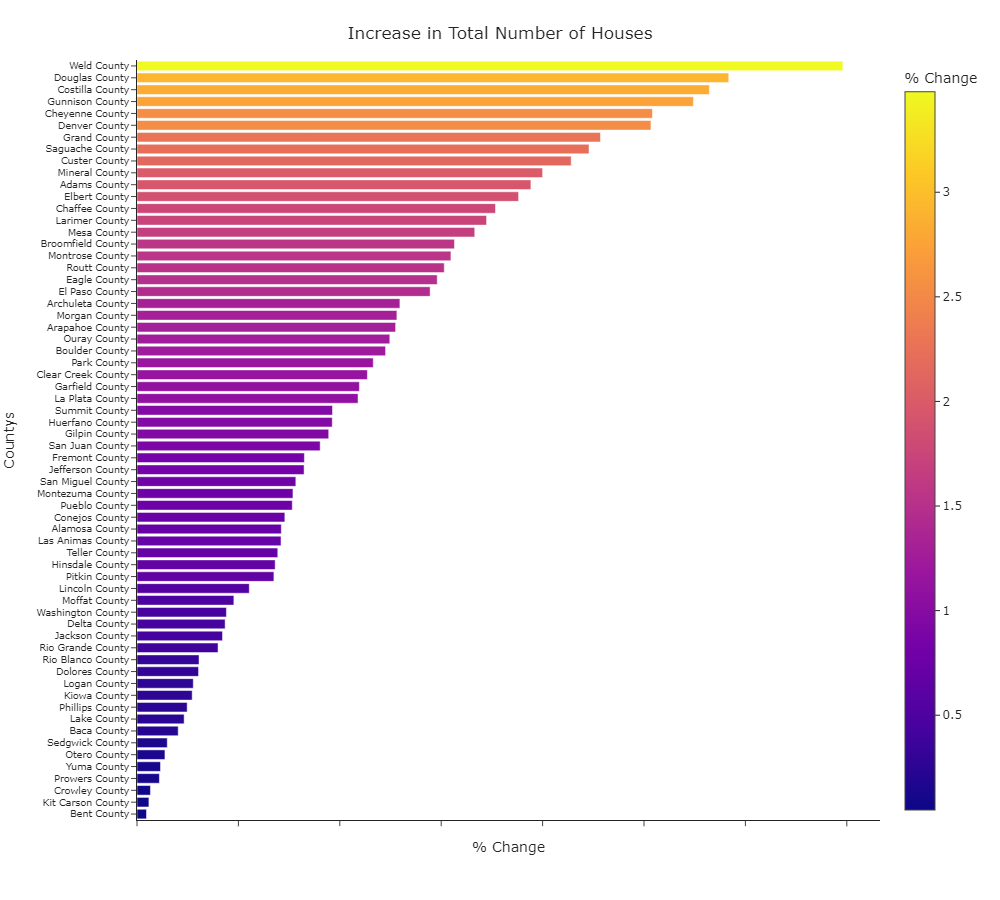